In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
# from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, 
    MaxPooling2D,
    Dense,
    Rescaling,
    Flatten,
    Dropout
)

from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score, 
    plot_confusion_matrix, 
    accuracy_score
)

import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
DIR = './data/malimg_paper_dataset_imgs/'

In [5]:
malware_directories = os.listdir(DIR)

In [6]:
try:
    os.remove(DIR+"malimg_dataset_readme.txt")
except FileNotFoundError:
    print("malimg_dataset_readme.txt not in directory, no worries")

malimg_dataset_readme.txt not in directory, no worries


In [5]:
print(f"This are the malware directoires:\n {malware_directories}")

This are the malware directoires:
 ['Dialplatform.B', 'Rbot!gen', 'Lolyda.AA2', 'Obfuscator.AD', 'Swizzor.gen!I', 'Allaple.L', 'Yuner.A', 'Instantaccess', 'Autorun.K', 'Lolyda.AA3', 'C2LOP.gen!g', 'Adialer.C', 'Malex.gen!J', 'Lolyda.AA1', 'Agent.FYI', 'C2LOP.P', 'Lolyda.AT', 'VB.AT', 'Allaple.A', 'Swizzor.gen!E', 'Fakerean', 'Wintrim.BX', 'Alueron.gen!J', 'Dontovo.A', 'Skintrim.N']


In [7]:
imgs_dir = [
    f"{DIR}{_dir}/{img}" for _dir in malware_directories \
    for img in os.listdir(DIR+_dir)
]
df_imgs_dir = pd.DataFrame(imgs_dir, columns=["directory"])

In [8]:
print(f"Some image directories: \n{imgs_dir[:10]}")

Some image directories: 
['./data/malimg_paper_dataset_imgs/Dialplatform.B/001e6cba868bc11b87a0da9ff5b753c2.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/03014ead48afed58fae06cc106c54b6f.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/00409e86a8ad9b52680427d6bd2086b0.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/04deac1ffbecdef2c29e6909a11ecd98.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/074aa42551252289f9e433deb7e3b6dd.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/088a00963c1e40251752a44ad06fb962.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/007ac7fc473b3df5aac6e55896807d4c.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/0078a70ff0c6a53ebd6a636b4afea711.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/072bfa69831bc7b961303724c2978c6c.png', './data/malimg_paper_dataset_imgs/Dialplatform.B/075ad7cfbec1359b5874c6846d4d1ca2.png']


In [9]:
img_count = [
    _dir for _dir in malware_directories \
    for img in os.listdir(DIR+_dir)
]
img_df = pd.DataFrame(img_count, columns=['malware'])

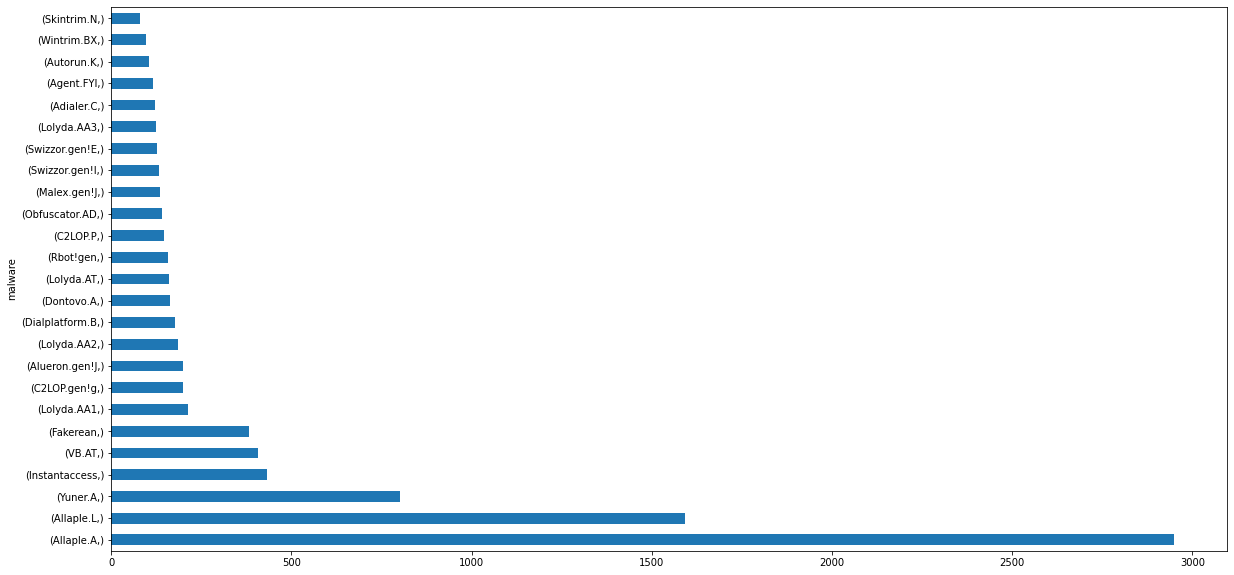

In [10]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
img_df.value_counts().plot(kind='barh');

In [11]:
img_df.value_counts()

malware       
Allaple.A         2949
Allaple.L         1591
Yuner.A            800
Instantaccess      431
VB.AT              408
Fakerean           381
Lolyda.AA1         213
C2LOP.gen!g        200
Alueron.gen!J      198
Lolyda.AA2         184
Dialplatform.B     177
Dontovo.A          162
Lolyda.AT          159
Rbot!gen           158
C2LOP.P            146
Obfuscator.AD      142
Malex.gen!J        136
Swizzor.gen!I      132
Swizzor.gen!E      128
Lolyda.AA3         123
Adialer.C          122
Agent.FYI          116
Autorun.K          106
Wintrim.BX          97
Skintrim.N          80
dtype: int64

## Ploteo de imágenes

In [12]:
sample_images = [
    (i, (df_imgs_dir[df_imgs_dir['directory'].str.find(i) != -1]).sample(random_state=12)['directory']) \
    for i in malware_directories
]

In [13]:
malware_directories

['Dialplatform.B',
 'Rbot!gen',
 'Lolyda.AA2',
 'Obfuscator.AD',
 'Swizzor.gen!I',
 'Allaple.L',
 'Yuner.A',
 'Instantaccess',
 'Autorun.K',
 'Lolyda.AA3',
 'C2LOP.gen!g',
 'Adialer.C',
 'Malex.gen!J',
 'Lolyda.AA1',
 'Agent.FYI',
 'C2LOP.P',
 'Lolyda.AT',
 'VB.AT',
 'Allaple.A',
 'Swizzor.gen!E',
 'Fakerean',
 'Wintrim.BX',
 'Alueron.gen!J',
 'Dontovo.A',
 'Skintrim.N']

In [14]:
rows = 5
columns = 5

In [15]:
plt.rcParams["figure.figsize"] = [20.00, 20.00]
plt.rcParams["figure.autolayout"] = True

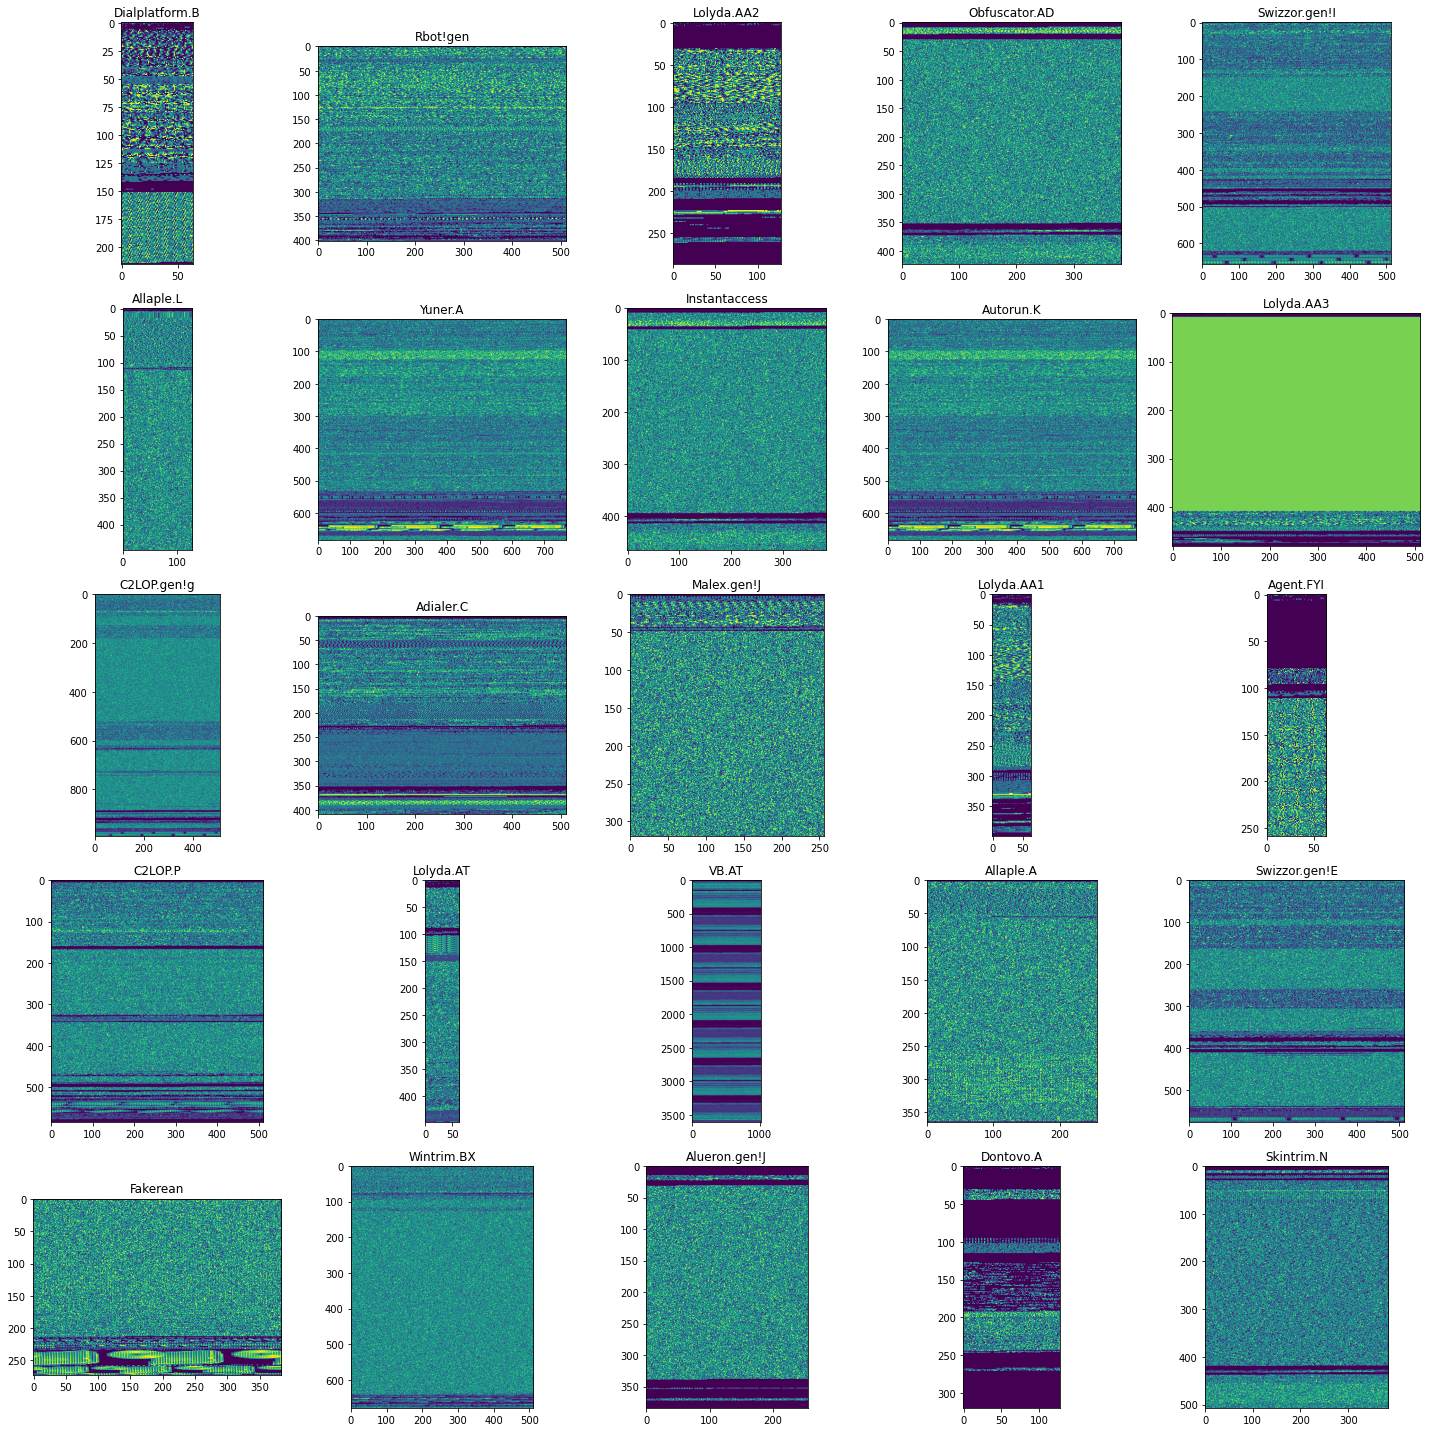

In [16]:
for idx, img_sample in enumerate(sample_images):
    plt.subplot(rows, columns, idx+1)
    img = mpimg.imread(img_sample[1].iloc[0])
    plt.imshow(img)
    plt.title(img_sample[0])

Se observa que las imágenes no tiene el mismo tamaño, se deberá preprocesarlas con el fin de poder tener un mismo tamaño para todas y así poder entrenar el modelo.

## Modelo

In [17]:
data_dir = DIR
batch_size = 32
img_height = 64
img_width = 64

In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 9339 files belonging to 25 classes.
Using 6538 files for training.


In [19]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 9339 files belonging to 25 classes.
Using 2801 files for validation.


**En este caso se utilizará el subconjunto de validación para las pruebas finales.**

In [20]:
class_names = train_ds.class_names
print("Nombres de los malwares: \n", class_names)

Nombres de los malwares: 
 ['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 64, 64, 3)
(32,)


El image batch es un tensor de la forma (32, 64, 64, 3).Esto es un lote de 32 imágenes de forma 64x64x3, esta última dimensión hace referencia a los canales de color RGB. El label batch es un tensor de la forma (32,) estas son las etiquetas corresponientes a las 32 imágenes.

Se procede a configurar el conjunto de datos para el rendimiento del modelo.
**Dataset.cache** \
**Datraset.prefetch**

In [22]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Estandarizar las imáges

Los valores de los canales RGB de las imáges de malware se encuentran en un rango de [0, 255]. Esto no es recomendable ya ue el modelo podría confundires o sobreajustarse. En general, se buscan valores pequeños. Se procede a estandarizar los valores de dichas matrices dentro de la red con la capa Rescaling.

In [23]:
num_classes = len(class_names)

In [24]:

model = tf.keras.Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])


In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0

In [27]:
epochs=10
history = model.fit(
  train_ds,
  #validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
205/205 [==============================] - 23s 77ms/step - loss: 0.8867 - accuracy: 0.7407
Epoch 2/10
205/205 [==============================] - 16s 77ms/step - loss: 0.1926 - accuracy: 0.9480
Epoch 3/10
205/205 [==============================] - 16s 78ms/step - loss: 0.1256 - accuracy: 0.9638
Epoch 4/10
205/205 [==============================] - 14s 70ms/step - loss: 0.0890 - accuracy: 0.9706
Epoch 5/10
205/205 [==============================] - 16s 80ms/step - loss: 0.0659 - accuracy: 0.9780
Epoch 6/10
205/205 [==============================] - 16s 78ms/step - loss: 0.0543 - accuracy: 0.9827
Epoch 7/10
205/205 [==============================] - 16s 77ms/step - loss: 0.0352 - accuracy: 0.9879
Epoch 8/10
205/205 [==============================] - 17s 85ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 9/10
205/205 [==============================] - 27s 131ms/step - loss: 0.0266 - accuracy: 0.9891
Epoch 10/10
205/205 [==============================] - 16s 80ms/step - loss: 0.02

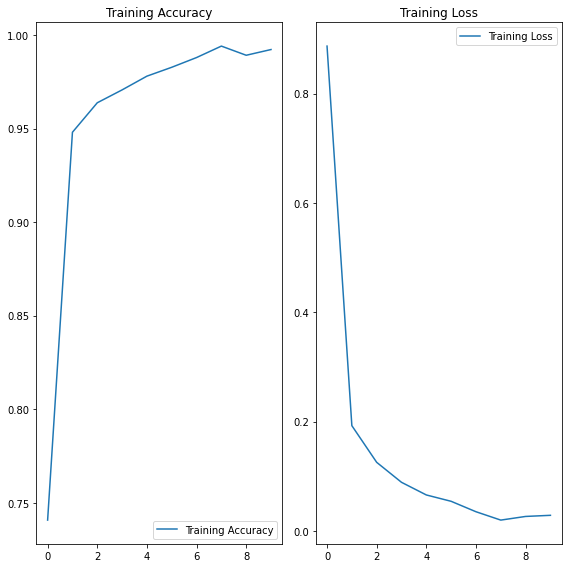

In [28]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()


**Inicialmente se observó que la gráfica de precisión incrementaba con respecto a las épocas. Esto nos daba lugar de sospechas de sobreajuste. Por lo que se consideró agregar una capa de DropOut. Con esto la gráfica de precisión dejó de dar indicios de sobre ajuste.**

## Pruebas

In [31]:
def get_metrics(y_val, predictions, model_name):
    conf_matrix = confusion_matrix(y_val, predictions, labels=list(range(1,26)))
    accu = accuracy_score(y_val, predictions)
    _recall_score = recall_score(y_val, predictions, average='weighted')
    _precision_score = precision_score(y_val, predictions, average='weighted')
    _f1_score = f1_score(y_val, predictions, average='weighted')

    print(f"\n---Metrics for {model_name}---")
    #print("\n Confusion Matrix\n", conf_matrix)
    print("\n Accuracy", accu)
    print("\n Precision", _precision_score)
    print("\n Recall", _recall_score)
    print("\n F1 Score", _f1_score)
    
    return conf_matrix
    

In [35]:
results = []
val_results = []
for image_batch, labels_batch in val_ds:
    for img in image_batch:
        img_array = tf.expand_dims(img, 0) 
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])
        results.append(np.argmax(score))
        #print(class_names[np.argmax(score)], 100 * np.max(score))
    for label in labels_batch:
        val_results.append(label.numpy())

In [36]:
conf_m = get_metrics(results, val_results, "Sequential NN")


---Metrics for Sequential NN---

 Accuracy 0.9807211710103535

 Precision 0.9826465092495668

 Recall 0.9807211710103535

 F1 Score 0.9809558202972858


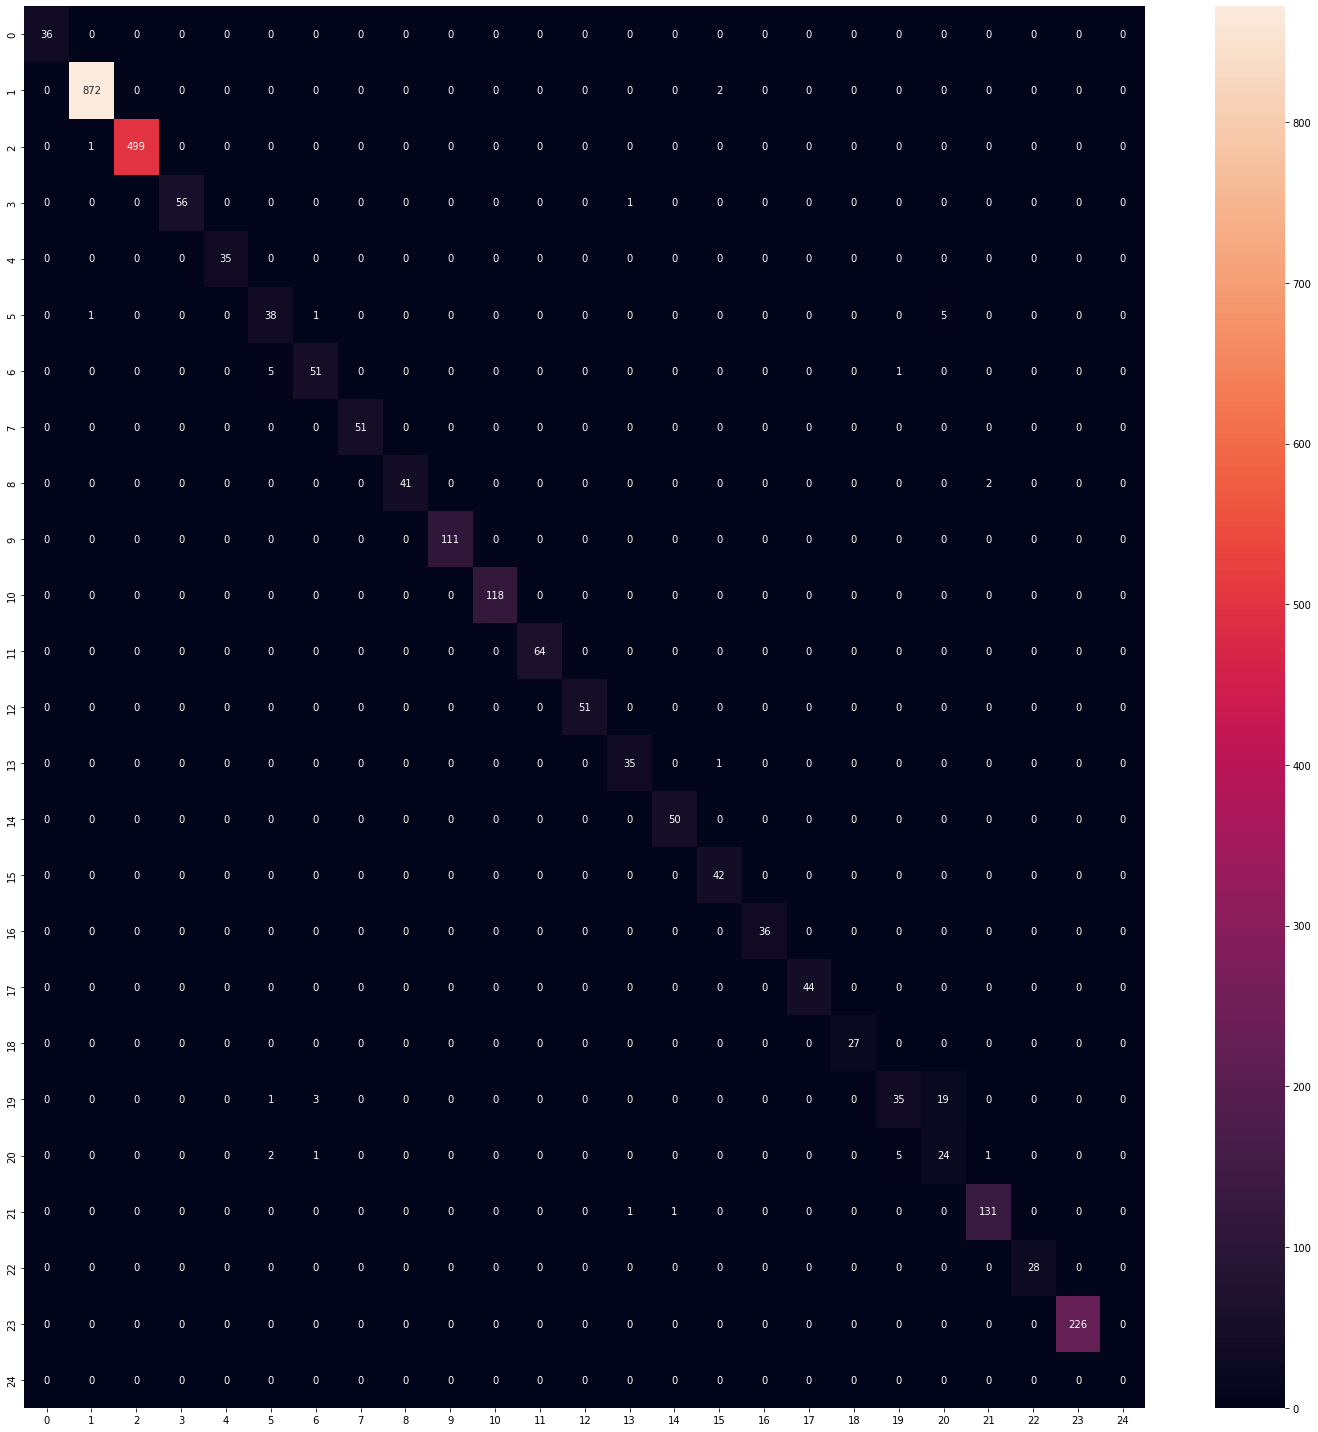

In [38]:
sns.heatmap(conf_m, annot=True, fmt=".4g");

## Conclusiones

En general el modelo obtuvo una buena precisión ~98%. Esto nos inidica que es bastante bueno para clasificar malware con la representación gráfica de un hash. Es importante observar las métricas de precision y recall pues el dataset estaba desbalanceado. Ambas métricas manejan valores bastente buenos por lo que en general el modelo es eficiente para clasificar adecuadamente aquellas imágenes que realmente son malware. Se logra observar en la matriz de confusión que las clasificación la realizó en la mayoría de casos adecuadamente. Se observa que a pesar que el dataset estaba desbalanceado se obtuvieron métricas adecuadas, el modelo no tomó en cuenta dicho desbalance y funcionó adecuadamente.